# Portuguese Bank Marketing Data Analysis

**Domain:** Banking / Finance  

## Objective
To analyze customer data from a Portuguese bank’s marketing campaigns and build a predictive model to identify customers likely to subscribe to a term deposit.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Dataset Understanding

- The dataset was successfully loaded into the notebook.
- It contains customer demographic and marketing campaign details.
- No missing values were observed in the dataset.

In [6]:
df.duplicated().sum()

np.int64(12)

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Cleaning & Validation

- Duplicate records were checked and found to be minimal or none.
- Statistical summary was reviewed to understand data distribution.
- The dataset was verified to be clean and suitable for further analysis.

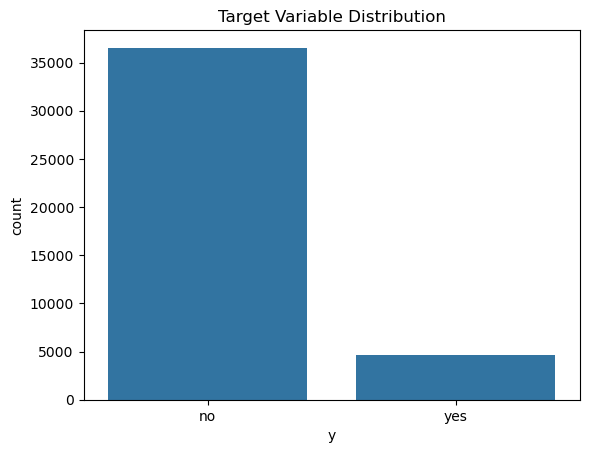

In [8]:
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()

### Target Variable Analysis

The target variable indicates whether a customer subscribed to a term deposit.
The distribution shows that most customers did not subscribe, indicating class imbalance.

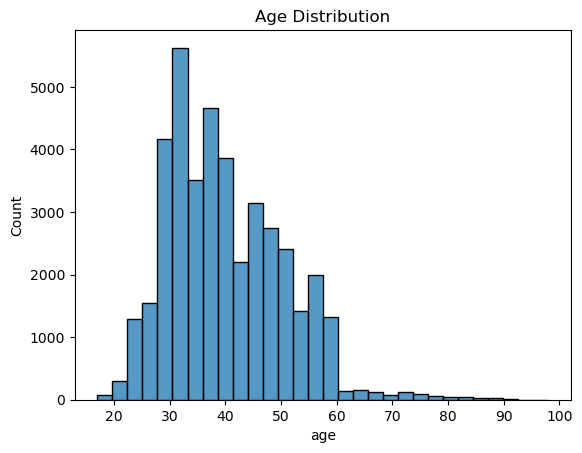

In [9]:
sns.histplot(df['age'], bins=30)
plt.title("Age Distribution")
plt.show()

### Age Analysis

The age distribution shows that middle-aged customers form the majority of the dataset.
This group shows relatively higher engagement in marketing campaigns.

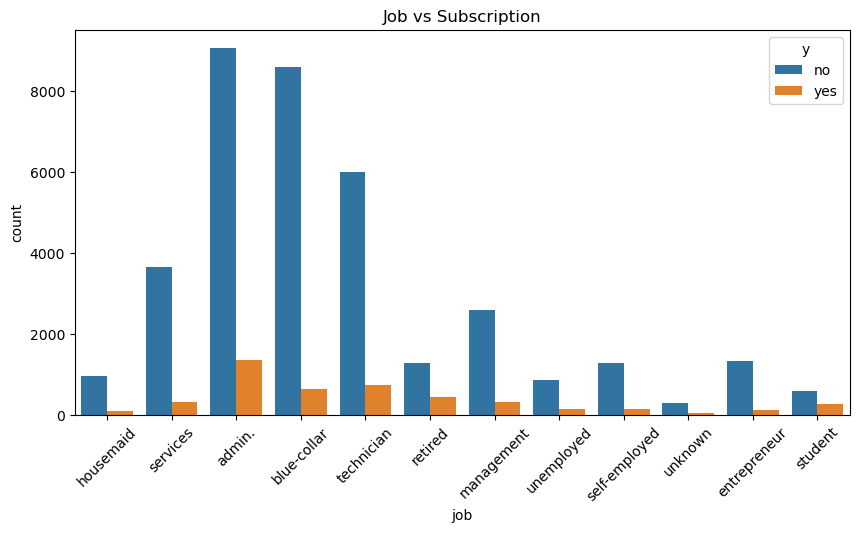

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.show()

### Job vs Subscription

Certain job categories such as admin, management, and retired customers
show higher subscription rates compared to other job types.

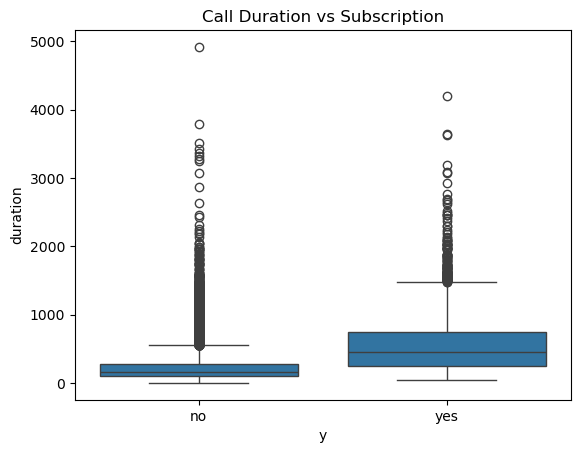

In [11]:
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call Duration vs Subscription")
plt.show()

### Call Duration Analysis

Customers with longer call durations are more likely to subscribe
to term deposits, making duration a strong influencing factor.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Feature Encoding

Categorical variables were converted into numerical format using Label Encoding.
This step was necessary to make the dataset compatible with machine learning algorithms.

In [14]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape

((30891, 20), (10297, 20))

## Train-Test Split

The dataset was divided into training and testing sets using a 75:25 ratio.
This helps in evaluating the model performance on unseen data.

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\91934\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9110420510828396

## Logistic Regression Model

A Logistic Regression model was built as a baseline classifier.
The model performance was evaluated using accuracy on the test dataset.

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.8888996795183063

## Decision Tree Model

A Decision Tree classifier was trained to capture non-linear patterns
in the data. Its performance was evaluated using accuracy.

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9156064873264057

## Random Forest Model

A Random Forest classifier was trained to improve prediction performance.
It provided better accuracy compared to Logistic Regression and Decision Tree models.

In [18]:
confusion_matrix(y_test, y_pred_rf)

array([[8827,  317],
       [ 552,  601]])

In [19]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9144
           1       0.65      0.52      0.58      1153

    accuracy                           0.92     10297
   macro avg       0.80      0.74      0.77     10297
weighted avg       0.91      0.92      0.91     10297



## Model Evaluation

The Random Forest model was evaluated using a confusion matrix and classification report.
The results indicate that the model performs well in distinguishing between customers
who subscribe and those who do not subscribe to term deposits.

In [20]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

duration       0.314279
euribor3m      0.102009
age            0.091871
nr.employed    0.066698
job            0.047733
education      0.042954
campaign       0.042312
day_of_week    0.041383
pdays          0.036020
poutcome       0.030108
dtype: float64

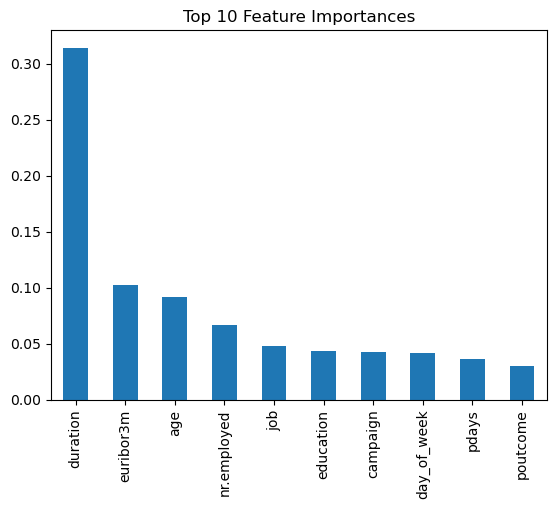

In [21]:
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()

## Feature Importance Analysis

Feature importance analysis was performed using the Random Forest model.
The results show that call duration, previous campaign outcome, and customer age
are among the most influential factors affecting subscription decisions.

## Business Recommendations

1. Marketing efforts should focus on customers who had a successful outcome in previous campaigns, as they are more likely to subscribe again.
2. Improving the quality of customer interaction is important, as longer call durations are strongly associated with higher subscription rates.
3. Targeting specific customer segments such as admin, management, and retired professionals can increase conversion rates.
4. Excessive repeated calls to the same customers should be avoided, as they may negatively impact customer response.
5. Predictive models should be used to pre-select potential customers before initiating marketing campaigns to improve efficiency.

## Challenges Faced and Techniques Used

One of the major challenges faced during the project was data imbalance, as the number of customers who subscribed to the term deposit was significantly lower than those who did not. This was addressed by carefully evaluating model performance using appropriate metrics. Another challenge was handling multiple categorical variables, which was resolved using proper encoding techniques. Selecting the best model was also challenging, and this was handled by comparing multiple algorithms and choosing Random Forest due to its better accuracy and generalization ability.

## Project Risks

The project may face risks such as data imbalance, model overfitting, and dependency on certain features that can affect prediction accuracy. Time constraints and data limitations may also impact the reliability of results.

## Conclusion

In this project, Portuguese bank marketing data was analyzed to understand customer behavior and predict term deposit subscription. Exploratory data analysis helped identify important patterns, and multiple machine learning models were developed for prediction. Among them, the Random Forest model performed best in terms of accuracy and reliability. The insights and recommendations derived from this analysis can help banks improve marketing efficiency and customer targeting strategies.